## Linear regression from scrach

In this notebook, we will use the "Laptop Price Prediction cleaned Dataset" available [here](https://www.kaggle.com/datasets/gyanprakashkushwaha/laptop-price-prediction-cleaned-dataset) and the libraries `pandas` and `matplotlib` to read in a dataset and perform some basic data analysis. Then we will implement from scratch a linear regression using `numpy` and compare it to the `scikit-learn` implemented linear regression.

### Installation & Setup

In [2]:
!pip install pandas
!pip install wordcloud
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

import warnings
warnings.filterwarnings("ignore")

In [3]:
import os
import pandas as pd

df = pd.read_pickle(os.path.join('data','dataset.pkl'))

### Exploratory Data Analysis

In [4]:
df.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [5]:
df.shape

(1273, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1273 non-null   object 
 1   TypeName     1273 non-null   object 
 2   Ram          1273 non-null   int64  
 3   Weight       1273 non-null   float64
 4   Price        1273 non-null   float64
 5   TouchScreen  1273 non-null   int64  
 6   Ips          1273 non-null   int64  
 7   Ppi          1273 non-null   float64
 8   Cpu_brand    1273 non-null   object 
 9   HDD          1273 non-null   int64  
 10  SSD          1273 non-null   int64  
 11  Gpu_brand    1273 non-null   object 
 12  Os           1273 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 129.4+ KB


In [7]:
df.isnull().sum()

Company        0
TypeName       0
Ram            0
Weight         0
Price          0
TouchScreen    0
Ips            0
Ppi            0
Cpu_brand      0
HDD            0
SSD            0
Gpu_brand      0
Os             0
dtype: int64

In [8]:
df['Company'].value_counts()

Company
Dell         291
Lenovo       289
HP           268
Asus         151
Acer         101
MSI           54
Toshiba       48
Apple         21
Samsung        8
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

In [9]:
df.describe()

,Ram,Weight,Price,TouchScreen,Ips,Ppi,HDD,SSD
count,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000
mean,8.447761,2.041100,10.828218,0.146897,0.279654,146.950812,413.715632,186.252946
std,5.098771,0.669241,0.619565,0.354142,0.449006,42.926775,518.054486,186.531571
min,2.000000,0.690000,9.134616,0.000000,0.000000,90.583402,0.000000,0.000000
25%,4.000000,1.500000,10.387379,0.000000,0.000000,127.335675,0.000000,0.000000
50%,8.000000,2.040000,10.872255,0.000000,0.000000,141.211998,0.000000,256.000000
75%,8.000000,2.310000,11.287447,0.000000,1.000000,157.350512,1000.000000,256.000000
max,64.000000,4.700000,12.691441,1.000000,1.000000,352.465147,2000.000000,1024.000000


### Feature Distribution

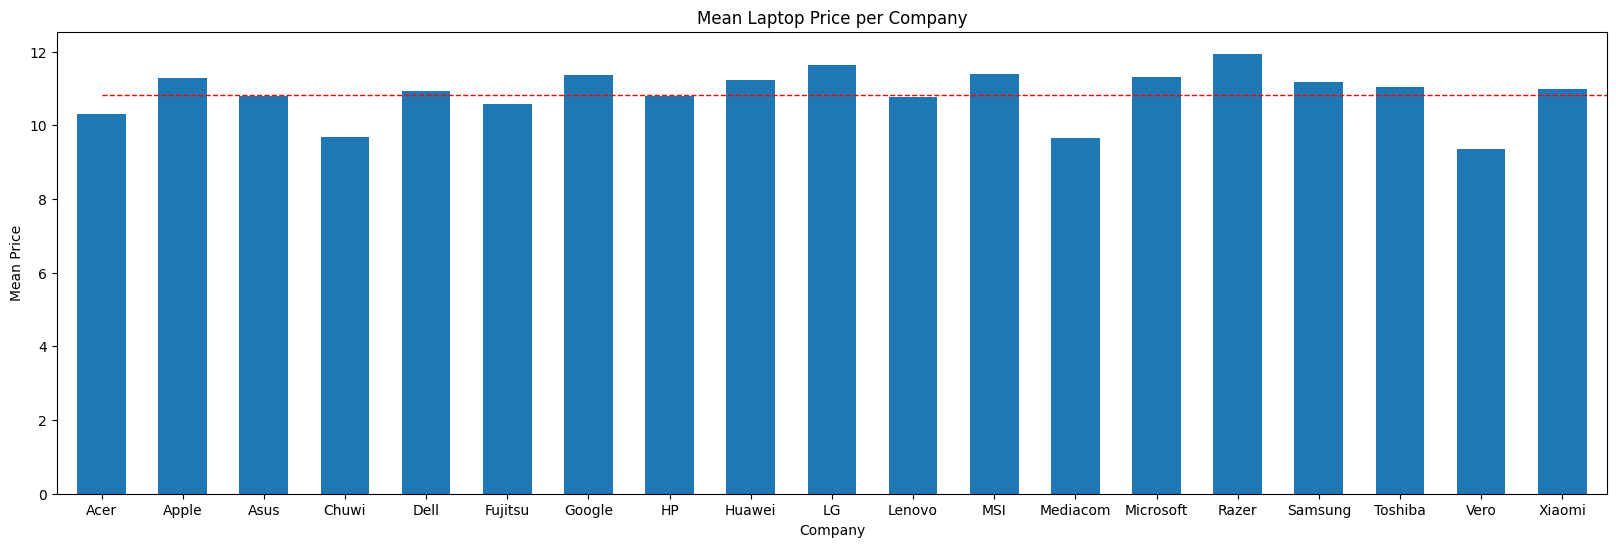

In [26]:
import matplotlib.pyplot as plt

mean_prices = df.groupby('Company')['Price'].mean()
general_mean = df['Price'].mean()
mean_prices.plot(kind='bar', width=0.6, figsize=(20,6))
plt.xlabel('Company')
plt.ylabel('Mean Price')
plt.plot([0, len(mean_prices)], [general_mean, general_mean], 'k--', lw=1, label='General Mean Price', color='red')
plt.title('Mean Laptop Price per Company')
plt.xticks(rotation=0)
plt.show()

Text(0.5, 1.0, 'Weight Distribution')

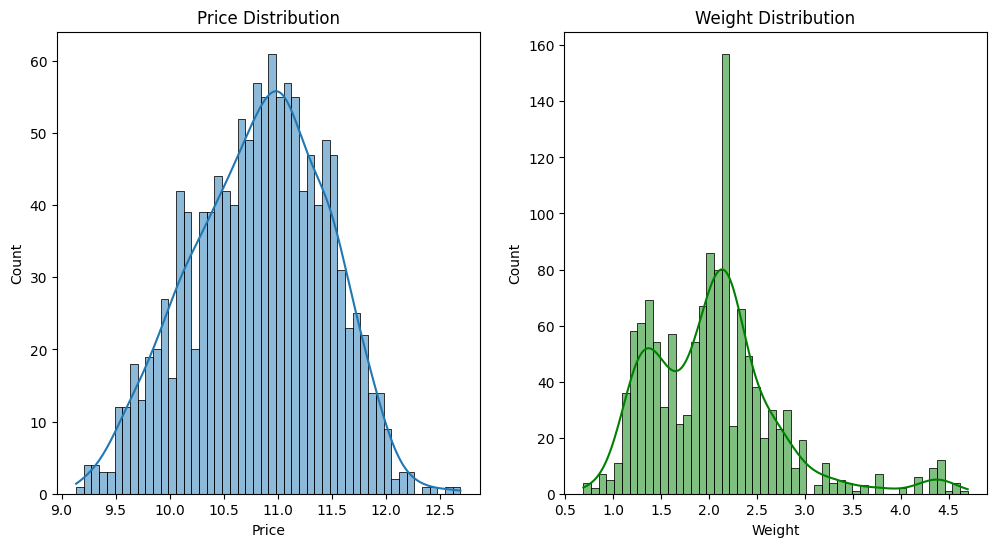

In [11]:
import seaborn as sns

plt.subplots(nrows=1,ncols=2,figsize = (12,6))
plt.subplot(1,2,1)
ax = sns.histplot(data=df, x='Price', bins=50, kde=True)
plt.title('Price Distribution')

plt.subplot(1,2,2)
sns.histplot(data=df, x='Weight', bins=50, kde=True, color='g')
plt.title('Weight Distribution')

### WorldCloud

That allows us to see the more represented Companies, GPU brands and OS !

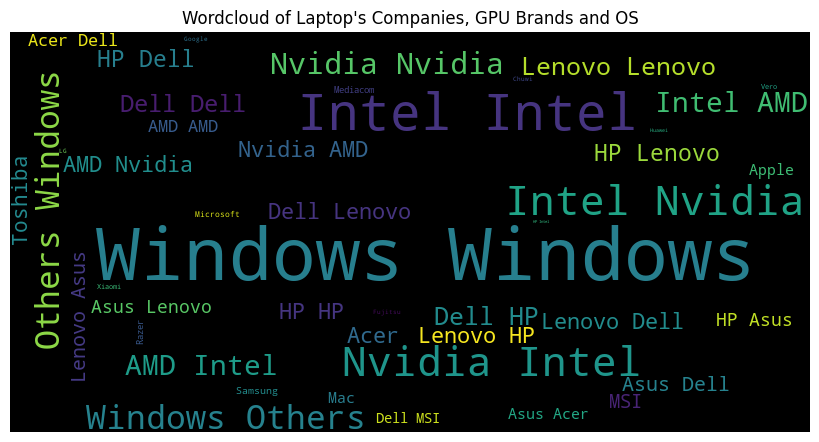

In [12]:
from wordcloud import WordCloud

text = ' '.join(df['Company'].values.tolist() + df['Gpu_brand'].values.tolist() + df['Os'].values.tolist())
wordcloud = WordCloud(width=800, height=400, background_color='black', mode='RGBA').generate(text)

plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.title('Wordcloud of Laptop\'s Companies, GPU Brands and OS')
plt.show()

### Feature Engineering

In [13]:
categorical_columns = df.select_dtypes(include='object').columns.tolist()
categorical_columns

['Company', 'TypeName', 'Cpu_brand', 'Gpu_brand', 'Os']

In [14]:
encoded_df = df.copy()

In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in categorical_columns:
    encoded_df[col] = le.fit_transform(df[col])

In [16]:
encoded_df.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,1,4,8,1.37,11.175755,0,1,226.983005,2,0,128,1,0
1,1,4,8,1.34,10.776777,0,0,127.677940,2,0,0,1,0
2,7,3,8,1.86,10.329931,0,0,141.211998,2,0,256,1,1
3,1,4,16,1.83,11.814476,0,1,220.534624,3,0,512,0,0
4,1,4,8,1.37,11.473101,0,1,226.983005,2,0,256,1,0


In [17]:
encoded_df.corr()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
Company,1.000000,0.005373,0.042571,-0.126177,0.138395,0.025781,0.109680,0.064264,0.019956,-0.126544,0.126847,0.037322,0.151563
TypeName,0.005373,1.000000,-0.244020,-0.278346,-0.125212,-0.404706,-0.154569,-0.028490,-0.121850,-0.199795,-0.073101,-0.252458,-0.110535
Ram,0.042571,-0.244020,1.000000,0.389134,0.680519,0.113316,0.202809,0.294927,0.244028,0.097340,0.599552,0.349895,0.124338
Weight,-0.126177,-0.278346,0.389134,1.000000,0.151386,-0.292288,0.023966,-0.319499,-0.053179,0.510876,-0.056985,0.350764,0.086381
Price,0.138395,-0.125212,0.680519,0.151386,1.000000,0.194289,0.279240,0.480687,0.201990,-0.097361,0.658808,0.363772,0.221188
TouchScreen,0.025781,-0.404706,0.113316,-0.292288,0.194289,1.000000,0.136973,0.452107,0.129662,-0.205105,0.252142,-0.043318,0.096422
Ips,0.109680,-0.154569,0.202809,0.023966,0.279240,0.136973,1.000000,0.288833,0.134275,-0.090411,0.215197,0.170454,0.001099
Ppi,0.064264,-0.028490,0.294927,-0.319499,0.480687,0.452107,0.288833,1.000000,0.218009,-0.290774,0.499899,0.075002,0.011975
Cpu_brand,0.019956,-0.121850,0.244028,-0.053179,0.201990,0.129662,0.134275,0.218009,1.000000,-0.083757,0.173887,0.339280,-0.050284
HDD,-0.126544,-0.199795,0.097340,0.510876,-0.097361,-0.205105,-0.090411,-0.290774,-0.083757,1.000000,-0.400625,0.142424,-0.002784


In [18]:
encoded_df['ScreenSize'] = encoded_df['Ppi'] * encoded_df['Weight']
encoded_df['StorageCapacity'] = encoded_df['HDD'] + encoded_df['SSD']

In [19]:
from sklearn.model_selection import train_test_split

X = encoded_df.drop('Price', axis=1)
y = encoded_df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
X_train.shape, X_test.shape

((1018, 14), (255, 14))

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# le=LabelEncoder()
# y_train = le.fit_transform(y_train)

In [22]:
X_train

array([[ 0.88265189,  0.31854658, -0.09515399, ...,  0.3754744 ,
         0.30935368, -0.7432861 ],
       [-1.11022778,  1.11923897, -0.09515399, ...,  0.3754744 ,
        -1.03250352, -0.19911224],
       [ 0.88265189, -2.08353059, -0.86700066, ...,  0.3754744 ,
        -0.14173875, -0.7432861 ],
       ...,
       [ 0.13532201,  0.31854658, -0.09515399, ...,  0.3754744 ,
        -0.75085029,  2.96389832],
       [ 0.88265189,  0.31854658, -0.09515399, ...,  0.3754744 ,
         0.30935368,  0.83821918],
       [ 0.88265189, -2.08353059, -0.86700066, ...,  0.3754744 ,
        -1.19530776, -1.28745996]])

In [23]:
y_train

490     10.895235
405     11.510858
156     10.419692
650     11.912579
770     11.049906
          ...    
1044    10.883316
1095    10.658922
1130    10.419692
860     10.721574
1126    10.147262
Name: Price, Length: 1018, dtype: float64

### Linear Regression From Scratch

In [28]:
import numpy as np

class LinearRegression:
    def __init__(self, lr:float = 0.01, num_epochs:int = 1000):
        self.lr = lr
        self.num_epochs = num_epochs
        self.weights = None
        self.bias = None
        self.losses = []

    def _mse(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)
    
    def fit(self, X: np.ndarray, y: np.ndarray):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.num_epochs):
            y_predicted = np.dot(X, self.weights) + self.bias

            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            
            self.losses.append(self._mse(y, y_predicted))

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

In [29]:
custom_model = LinearRegression()
custom_model.fit(X_train, y_train)

In [30]:
custom_model.losses[-1]

0.14021743001925355

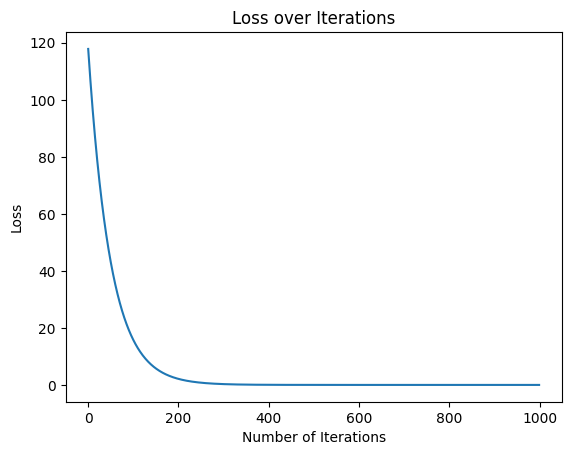

In [31]:
plt.plot(range(custom_model.num_epochs), custom_model.losses)
plt.title('Loss over Iterations')
plt.xlabel('Number of Iterations')
plt.ylabel('Loss')
plt.show()

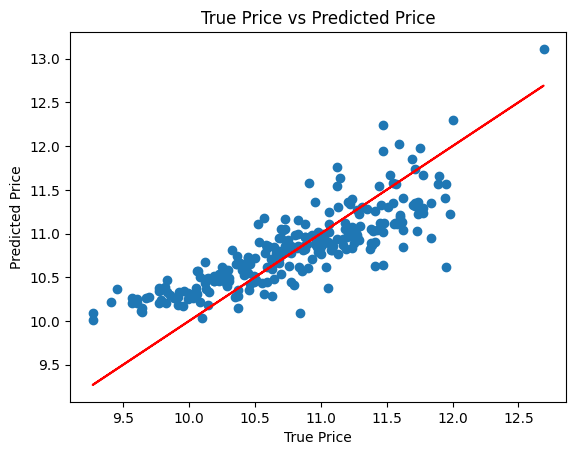

In [32]:
y_pred = custom_model.predict(X_test)

plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='red')
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.title('True Price vs Predicted Price')
plt.show()

### Linear Regression Using Scikit-Learn

In [34]:
from sklearn import linear_model

model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [35]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mse

0.13259934231587206

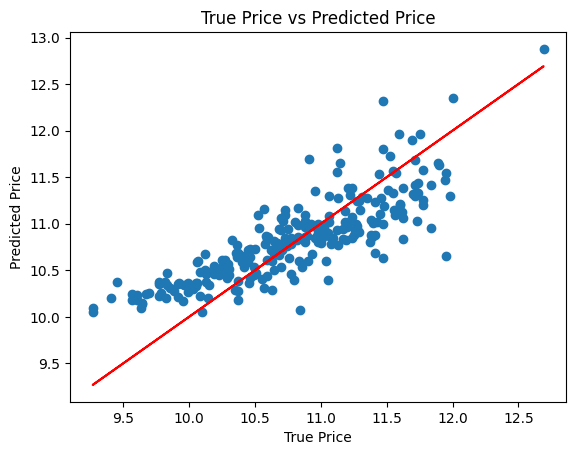

In [36]:
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='red')
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.title('True Price vs Predicted Price')
plt.show()